<h2>SENTIMENT ANALYSIS<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


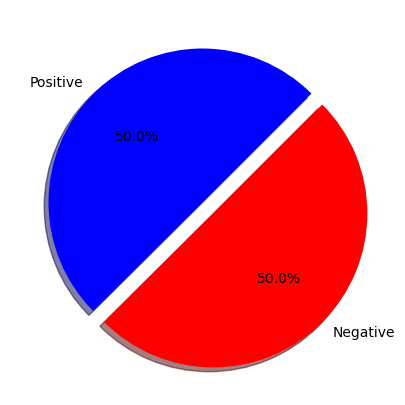

In [8]:
fig=plt.figure(figsize=(5,5))
colors=["blue",'red']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [9]:
data['text'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

# remove tags/emojis/./,  etc

In [10]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

In [11]:
data['text'][1]

'when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strong points of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kick ass soundtrack but to my disappointment not any of this is to be found in atlantis milo s return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentioned when the first scene appears your in for a shock if you just picked atlantis milo s return from the display case at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a sad

In [17]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in str(text).split()]

In [13]:
data['text']=data['text'].apply(tokenizer_porter)

In [25]:
data['text'][1]

['when',
 'i',
 'put',
 'thi',
 'movi',
 'in',
 'my',
 'dvd',
 'player',
 'and',
 'sat',
 'down',
 'with',
 'a',
 'coke',
 'and',
 'some',
 'chip',
 'i',
 'had',
 'some',
 'expect',
 'i',
 'wa',
 'hope',
 'that',
 'thi',
 'movi',
 'would',
 'contain',
 'some',
 'of',
 'the',
 'strong',
 'point',
 'of',
 'the',
 'first',
 'movi',
 'awsom',
 'anim',
 'good',
 'flow',
 'stori',
 'excel',
 'voic',
 'cast',
 'funni',
 'comedi',
 'and',
 'a',
 'kick',
 'ass',
 'soundtrack',
 'but',
 'to',
 'my',
 'disappoint',
 'not',
 'ani',
 'of',
 'thi',
 'is',
 'to',
 'be',
 'found',
 'in',
 'atlanti',
 'milo',
 's',
 'return',
 'had',
 'i',
 'read',
 'some',
 'review',
 'first',
 'i',
 'might',
 'not',
 'have',
 'been',
 'so',
 'let',
 'down',
 'the',
 'follow',
 'paragraph',
 'will',
 'be',
 'direct',
 'to',
 'those',
 'who',
 'have',
 'seen',
 'the',
 'first',
 'movi',
 'and',
 'who',
 'enjoy',
 'it',
 'primarili',
 'for',
 'the',
 'point',
 'mention',
 'when',
 'the',
 'first',
 'scene',
 'appear',
 

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def stopw_rem(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)




In [ ]:
data['text'] = data['text']
data['text'] = data['text'].apply(stopw_rem)

In [28]:
pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 1.5 MB/s eta 0:00:00


Positive words are as follows


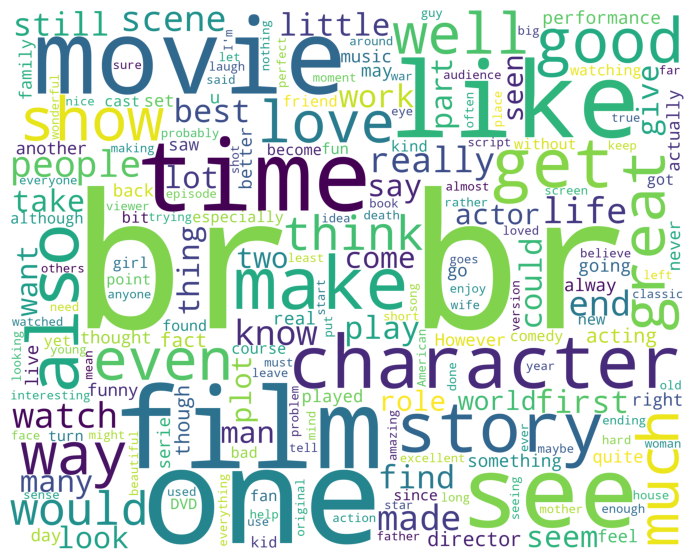

Negative words are as follows


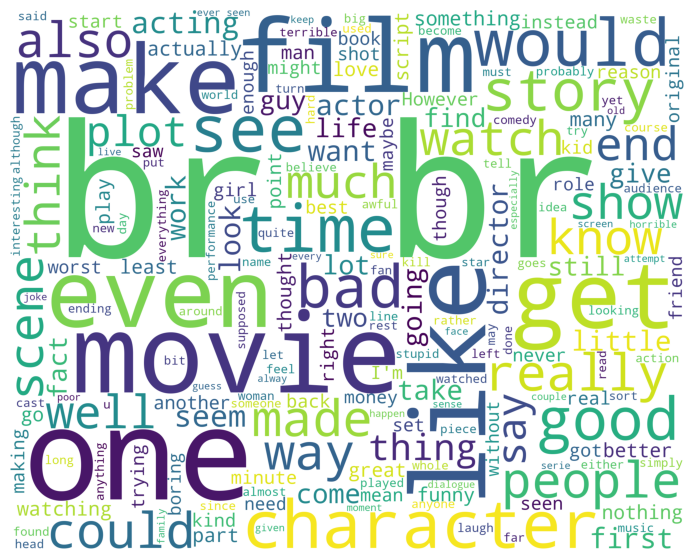

In [5]:
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = " ".join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [6]:
# Tf-Idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [20]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  2.8min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.5min finished


In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8907
